# <center> Supervised learning: Classification with Titanic dataset </center>

## 1. Data types

![](https://miro.medium.com/max/1200/0*tZj7CTvSzNcjnISR)

## 2. Classification vs Regression
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 3. Titanic dataset

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

#### **'Normal:'** dịnh danh, **'Accuracy:'** độ chính xác, Boolean ~ Binary (just have True/False)
#### --> There are three ways to **'impute'** (xử lý Missing Values):
- use (Mean, Median, Mode)
- Scaler (tự truyền 1 giá trị)
- **combine behaviour features**
- **model-based (1-NN)**

## Raw Data --> EDA (Data Processing) --> Feature Engineering (One-hot-encoding: (get_dummies, up/down sampling...), Meaningful features, Nomalization...) --> Feature Selection --> Model ...

## <------------------------------------------------------------------------------------------------------------------------------------------------->

In [1]:
# Load datasets:
import pandas as pd
import numpy as np
# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
# Train models:
# (below, it depends on which model we use to call models' name)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# evaluate:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# plot of Confusion_matrix:
from sklearn.metrics import plot_confusion_matrix

# save Models:
import pickle as pkl
import joblib

# process Raw data automatically:
from sklearn.pipeline import Pipeline   
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
(titanic.isna().sum()/len(titanic))*100                                           # calculate % of missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

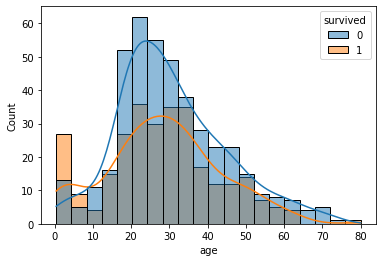

In [6]:
sns.histplot(titanic, x='age', hue='survived', kde=True)                     # hue='label': count quantity Y/N theo nhãn (phân màu theo 'survived')
plt.show()                                                                   # kde=True:    draw line graph

#### Hypothesis 1: High fare in correlation with age, better alive chance

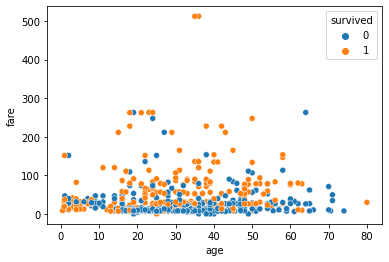

In [7]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')
plt.show()

#### Hypothesis 2-3: Sibsp and Parch in correlation with age, better alive chance

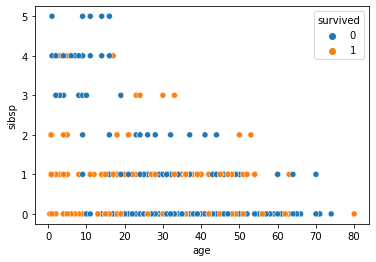

In [8]:
sns.scatterplot(data=titanic, x='age', y='sibsp', hue='survived')
plt.show()

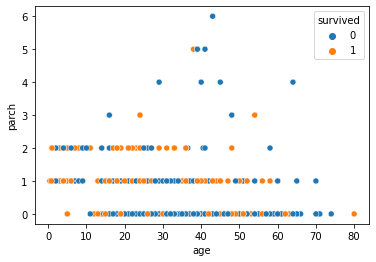

In [9]:
sns.scatterplot(data=titanic, x='age', y='parch', hue='survived')
plt.show()

In [10]:
titanic['sibsp'].value_counts(), titanic['parch'].value_counts()

(0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: sibsp, dtype: int64,
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: parch, dtype: int64)

## ** Interquartile:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png)

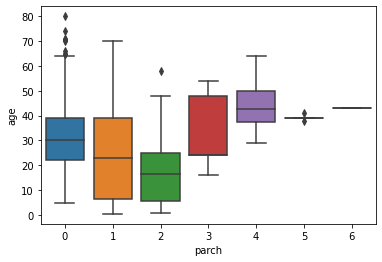

In [11]:
sns.boxplot(data=titanic, x='parch', y='age')
plt.show()

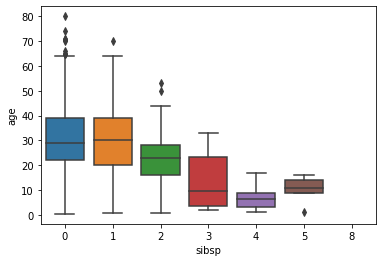

In [12]:
sns.boxplot(data=titanic, x='sibsp', y='age')
plt.show()

# **Age**

In [13]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

In [14]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

#### - Average Age which is mean value of (who, sibsp, parch)

In [15]:
titanic.groupby(['who','sibsp','parch']).age.mean()

who    sibsp  parch
child  0      0        12.166667
              1         6.052500
              2         4.981111
       1      0        13.900000
              1         4.566667
              2         5.274286
       2      1         2.300000
              2         9.000000
       3      1         4.333333
              2         6.250000
       4      1         5.625000
              2         6.125000
       5      2         8.750000
man    0      0        32.973597
              1        38.583333
              2        35.800000
       1      0        32.701923
              1        36.000000
              2        30.750000
              3        16.000000
              4        52.000000
              5        39.000000
       2      0        31.181818
              1        23.000000
       3      1              NaN
              2        19.000000
       4      1        16.000000
       8      2              NaN
woman  0      0        31.084211
              1        

In [16]:
titanic.groupby(['who','sibsp','parch']).age.agg([len, np.mean, lambda x: (x.isnull().sum()/len(x))])                           # np.mean = 'mean'

len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597    0.260976
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923    0.118644
            1       21.0  36.000000    0.095238
            2        5.0  30.750000    0.200000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818    0.153846
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN    1.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN    1.000000
woman 0     0      121.0  31.084211    0.214876
            1       18.0  34.176471    0.055556
            2       15.0  26.833333    0.200000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556    0.237288
            1       21.0  35.450000    0.047619
            2        7.0  31.333333    0.142857
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000    0.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN    1.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN    1.000000

#### - Thấy mối liên hệ giữa (who, sibsp, parch) và (age) --> fill Null = gtri Mean của (who, sibsp, parch)

In [17]:
ser = titanic.groupby(['who','sibsp','parch']).age.apply(lambda x: (x.fillna(np.mean(x))))                           # np.mean(x) = x.mean()
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [18]:
titanic.age.isna().sum()

177

In [19]:
titanic.age = ser
titanic.age.isnull().sum()

11

#### - Giá trị (age) vẫn bị Null nếu (who) được Groupby --> những gtri Null còn lại Groupby theo(sibsp, parch)

In [20]:
ser_1 = titanic.groupby(['sibsp','parch']).age.apply(lambda x: (x.fillna(np.mean(x))))                               # np.mean(x) = x.mean()
titanic.age = ser_1
titanic.age.isnull().sum()

7

In [21]:
titanic.groupby(['who','sibsp','parch']).age.agg([len, np.mean, lambda x: (x.isnull().sum()/len(x))]) 

len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667         0.0
            1        8.0   6.052500         0.0
            2        9.0   4.981111         0.0
      1     0        5.0  13.900000         0.0
            1       15.0   4.566667         0.0
            2        7.0   5.274286         0.0
      2     1        5.0   2.300000         0.0
            2        1.0   9.000000         0.0
      3     1        3.0   4.333333         0.0
            2        4.0   6.250000         0.0
      4     1        8.0   5.625000         0.0
            2        8.0   6.125000         0.0
      5     2        4.0   8.750000         0.0
man   0     0      410.0  32.973597         0.0
            1       12.0  38.583333         0.0
            2        5.0  35.800000         0.0
      1     0       59.0  32.701923         0.0
            1       21.0  36.000000         0.0
            2        5.0  30.750000         0.0
            3        1.0  16.000000         0.0
            4        2.0  52.000000         0.0
            5        1.0  39.000000         0.0
      2     0       13.0  31.181818         0.0
            1        1.0  23.000000         0.0
      3     1        1.0   4.333333         0.0
            2        1.0  19.000000         0.0
      4     1        1.0  16.000000         0.0
      8     2        4.0        NaN         1.0
woman 0     0      121.0  31.084211         0.0
            1       18.0  34.176471         0.0
            2       15.0  26.833333         0.0
            3        1.0  24.000000         0.0
            4        1.0  29.000000         0.0
            5        2.0  40.000000         0.0
      1     0       59.0  33.355556         0.0
            1       21.0  35.450000         0.0
            2        7.0  31.333333         0.0
            3        2.0  51.000000         0.0
            4        1.0  45.000000         0.0
            5        2.0  38.500000         0.0
            6        1.0  43.000000         0.0
      2     0        3.0  35.500000         0.0
            1        1.0  24.000000         0.0
            2        3.0  20.000000         0.0
            3        1.0  24.000000         0.0
      3     0        2.0  31.500000         0.0
            1        3.0   4.333333         0.0
            2        2.0  23.500000         0.0
      4     2        1.0  17.000000         0.0
      5     2        1.0  16.000000         0.0
      8     2        3.0        NaN         1.0

#### - Còn 7 Missing Values
#### --> Áp dụng kthuc Domain thấy người đi cùng 8 sibsp và 2 parch bị Null -> k/năng những người đó thuộc nhóm Child

In [22]:
kid_avg_age = titanic[titanic.who == 'child'].age.mean()
kid_avg_age

6.369518072289157

In [23]:
titanic.age = titanic['age'].fillna(kid_avg_age)
titanic.age.isnull().sum()

0

# **Embarked**

In [24]:
titanic['embarked'].value_counts(dropna=False)                                               # (dropna=False) --> để count cả Missing Values

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [25]:
titanic[titanic['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


#### - Điểm chung của 2 Missing Values này:
- survived = 1
- pclass = 1
- sex = 'female'
- sibsp & parch = 0

In [26]:
### C1:
filter1 = titanic['survived'] == 1
filter2 = titanic['pclass'] == 1
filter3 = titanic['sex'] == 'female'
filter4 = titanic['sibsp'] == 0
filter5 = titanic['parch'] == 0
ser2 = titanic[filter1 & filter2 & filter3 & filter4 & filter5]

In [27]:
ser2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [28]:
### C2:
titanic.query('survived == 1 & pclass == 1 & sex == "female" & sibsp == 0 & parch == 0')                                               # use '&' or 'and' is OK

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


#### - Xem những người trên chọn (embarked) nào nhiều nhất

In [29]:
### C1:
ser2['embarked'].mode()[0]

'C'

In [30]:
### C2:
ser2['embarked'].value_counts().idxmax()

'C'

In [31]:
ser2['embarked'].value_counts().max()

17

#### - Fill 2 missing values = gtri (embarked) được chọn nhiều nhất 

In [32]:
titanic['embarked'] = titanic['embarked'].fillna(ser2['embarked'].mode()[0])
titanic['embarked'].isna().sum()

0

# **Deck**

In [33]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### - show mỗi (deck) tập trung vào hạng vé nào (pclass)

In [35]:
### C1:
titanic.pivot_table(index='deck',                                    # pivot_table ~ groupby
                    columns='pclass',
                   values='survived',
                   aggfunc='count')

pclass,1,2,3
deck,,,
A,15.0,NaN,NaN
B,47.0,NaN,NaN
C,59.0,NaN,NaN
D,29.0,4.0,NaN
E,25.0,4.0,3.0
F,NaN,8.0,5.0
G,NaN,NaN,4.0


In [36]:
### C2:
titanic.groupby(['deck', 'pclass']).agg(len)

survived   sex   age  sibsp  parch  fare  embarked  class   who  \
deck pclass                                                                    
A    1           15.0  15.0  15.0   15.0   15.0  15.0      15.0   15.0  15.0   
     2            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
     3            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
B    1           47.0  47.0  47.0   47.0   47.0  47.0      47.0   47.0  47.0   
     2            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
     3            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
C    1           59.0  59.0  59.0   59.0   59.0  59.0      59.0   59.0  59.0   
     2            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
     3            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
D    1           29.0  29.0  29.0   29.0   29.0  29.0      29.0   29.0  29.0   
     2            4.0   4.0   4.0    4.0    4.0   4.0       4.0    4.0   4.0   
     3            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
E    1           25.0  25.0  25.0   25.0   25.0  25.0      25.0   25.0  25.0   
     2            4.0   4.0   4.0    4.0    4.0   4.0       4.0    4.0   4.0   
     3            3.0   3.0   3.0    3.0    3.0   3.0       3.0    3.0   3.0   
F    1            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
     2            8.0   8.0   8.0    8.0    8.0   8.0       8.0    8.0   8.0   
     3            5.0   5.0   5.0    5.0    5.0   5.0       5.0    5.0   5.0   
G    1            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
     2            NaN   NaN   NaN    NaN    NaN   NaN       NaN    NaN   NaN   
     3            4.0   4.0   4.0    4.0    4.0   4.0       4.0    4.0   4.0   

             adult_male  embark_town  alive  alone  
deck pclass                                         
A    1             15.0         15.0   15.0   15.0  
     2              NaN          NaN    NaN    NaN  
     3              NaN          NaN    NaN    NaN  
B    1             47.0         47.0   47.0   47.0  
     2              NaN          NaN    NaN    NaN  
     3              NaN          NaN    NaN    NaN  
C    1             59.0         59.0   59.0   59.0  
     2              NaN          NaN    NaN    NaN  
     3              NaN          NaN    NaN    NaN  
D    1             29.0         29.0   29.0   29.0  
     2              4.0          4.0    4.0    4.0  
     3              NaN          NaN    NaN    NaN  
E    1             25.0         25.0   25.0   25.0  
     2              4.0          4.0    4.0    4.0  
     3              3.0          3.0    3.0    3.0  
F    1              NaN          NaN    NaN    NaN  
     2              8.0          8.0    8.0    8.0  
     3              5.0          5.0    5.0    5.0  
G    1              NaN          NaN    NaN    NaN  
     2              NaN          NaN    NaN    NaN  
     3              4.0          4.0    4.0    4.0

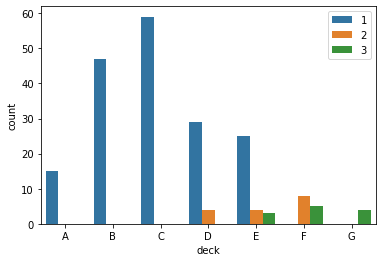

In [37]:
sns.countplot(data=titanic, x='deck', hue='pclass')
plt.legend(loc='upper right')                                              # loc='upper right' : vị trí của phần chú thích
plt.show()

#### - Quan sát thấy: (pclass = 1 --> C), (pclass = 2/3 --> F)

In [38]:
deck_dict = {1: 'C',
             2: 'F',
             3: 'F'}
ser3 = titanic['pclass'].map(deck_dict)                     # sdung Series.map({dict}) để với mỗi gtri của Series sẽ được replace bằng mỗi gtri tương ứng như hàm dict đã đ/nghĩa trog map()
ser3

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

### - for s,d in zip(ser3,deck):
            if...
            else...
### --> sdung hàm **combine_first()** instead of dùng vòng for như trên

#### - **combine_first(ser3)** sẽ truyền những giá trị của ser3 vào những gtri NULL ở cột (deck)

In [39]:
new_deck = titanic['deck'].combine_first(ser3)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

In [40]:
titanic.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [41]:
titanic.deck = new_deck
titanic.deck.value_counts(dropna=False)

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [42]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

# Feature Engineering:
**Discretization**
- Supervised:
    - Equal-width discretization               'pd.cut()'
    - Equal-frequent discretization            'pd.qcut()'
- Unsupervised:
    - Entropy-based discretization

In [43]:
titanic.age.describe()

count    891.000000
mean      29.945476
std       13.342194
min        0.420000
25%       22.000000
50%       31.084211
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [44]:
pd.cut(titanic.age, bins=10)                                               # bins: số nhóm muốn chia ra

0      (16.336, 24.294]
1       (32.252, 40.21]
2      (24.294, 32.252]
3       (32.252, 40.21]
4       (32.252, 40.21]
             ...       
886    (24.294, 32.252]
887    (16.336, 24.294]
888    (24.294, 32.252]
889    (24.294, 32.252]
890    (24.294, 32.252]
Name: age, Length: 891, dtype: category
Categories (10, interval[float64]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] < (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

In [45]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic.age, bins=age_groups)                                             # bins: số nhóm muốn chia ra

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [46]:
titanic['age_groups'] = pd.cut(titanic.age, bins=age_groups)                      # bins: số nhóm muốn chia ra

In [47]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]"


### **- Find meaningful features**

- feature scaling (feature nomalization) - a important step

In [48]:
titanic['rich_women'] = (titanic['sex'] == 'female') & (titanic['pclass'] == 1)
titanic.rich_women

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: rich_women, Length: 891, dtype: bool

In [49]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,rich_women
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False


#### - Thấy features đều có dạng boolean(binary), riêng col='fare' có values lớn

In [50]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

**--> Practice with (fare) to create meaningful features**

#### - Biến những col có values as Categorical về dạng numbers
- Biến đổi gtri (converted data) gọi là **One hot encoding**

- Sex

In [51]:
### C1:
titanic['sex'] = titanic['sex'].map({'female': 1, 'male': 0})
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,rich_women
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False


#### - Cách 2 thường được sdung khi có dữ liệu lớn và trong ngôn ngữ lớn như (pyspark)

In [52]:
### C2:
titanic_1 = sns.load_dataset('titanic')
titanic_1['sex'].eq('female').astype(int).value_counts() 

0    577
1    314
Name: sex, dtype: int64

- Deck

In [53]:
titanic.deck.value_counts()

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

#### - Nhìn code 37: deck A,B,C là những KH đi hạng sang hơn

In [54]:
ser4 = titanic['deck'].map({'A': 1,
                           'B': 1,
                           'C': 1,
                           'D': 0,
                           'E': 0,
                           'F': 0,
                           'G': 0})
ser4

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: deck, Length: 891, dtype: int64

In [55]:
titanic['new_deck'] = ser4
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,rich_women,new_deck
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False,0
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False,0


- Adult_male, Alone, Rich_women

#### - 3 cột (adult_male, alone, rich_women) cùng có những gtri là True / False
- --> dùng vòng lặp For để đưa 3 cột trên từ Boolean về Int

In [56]:
for col in ['adult_male', 'alone', 'rich_women']:
    titanic[col] = titanic[col].astype(int)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,rich_women,new_deck
0,0,3,0,22.0,1,0,7.2500,S,Third,man,1,F,Southampton,no,0,"(15, 25]",0,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,"(35, 45]",1,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,0,F,Southampton,yes,1,"(25, 35]",0,0
3,1,1,1,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,"(25, 35]",1,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,1,F,Southampton,no,1,"(25, 35]",0,0


- Age_groups

In [57]:
titanic.age_groups.value_counts()

(25, 35]     358
(15, 25]     218
(35, 45]     118
(0, 15]       94
(45, 60]      81
(60, 80]      22
(80, 100]      0
Name: age_groups, dtype: int64

#### - Với dạng data (age_groups) như trên thì khó xử lý và đối với 1 số Models sẽ không nhận dạng (e.g: XGBoost), vì vậy nên chuyển về theo kiểu sau (dùng str.strip() & str.replace())

In [58]:
titanic['age_groups'] = titanic['age_groups'].astype(str).str.strip('()[]').str.replace(', ','_')               # str.strip(): xóa kí tự
titanic['age_groups']                                                                                           # str.replace(): thay thế kí tự

0      15_25
1      35_45
2      25_35
3      25_35
4      25_35
       ...  
886    25_35
887    15_25
888    25_35
889    25_35
890    25_35
Name: age_groups, Length: 891, dtype: object

#### - Khi col được chia ra nhiều nhóm khác nhau thì thực hiện **One hot encoding** bằng cách dùng **get_dummies**
#### --> khi đó dữ liệu trả về chia thành nhiều cột (nhiều nhóm) có values = True / False

In [59]:
dummies = pd.get_dummies(titanic[['age_groups','embarked','who']])
dummies

,age_groups_0_15,age_groups_15_25,age_groups_25_35,age_groups_35_45,age_groups_45_60,age_groups_60_80,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0,0,1,0,1,0
887,0,1,0,0,0,0,0,0,1,0,0,1
888,0,0,1,0,0,0,0,0,1,0,0,1
889,0,0,1,0,0,0,1,0,0,0,1,0


In [60]:
titanic_new = titanic.join(dummies)                                              # ~ merge(on=,how='')
titanic_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,age_groups_25_35,age_groups_35_45,age_groups_45_60,age_groups_60_80,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,0,22.0,1,0,7.2500,S,Third,man,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,...,0,1,0,0,1,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,...,1,0,0,0,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,First,woman,...,1,0,0,0,0,0,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,...,1,0,0,0,0,0,1,0,1,0


## Train Model

In [61]:
titanic_new.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_groups', 'rich_women', 'new_deck',
       'age_groups_0_15', 'age_groups_15_25', 'age_groups_25_35',
       'age_groups_35_45', 'age_groups_45_60', 'age_groups_60_80',
       'embarked_C', 'embarked_Q', 'embarked_S', 'who_child', 'who_man',
       'who_woman'],
      dtype='object')

In [62]:
titanic_new.drop(columns=['sex','age','fare','embarked','class','who','adult_male','deck','embark_town','alive','alone','age_groups'], inplace=True)
titanic_new.head()

,survived,pclass,sibsp,parch,rich_women,new_deck,age_groups_0_15,age_groups_15_25,age_groups_25_35,age_groups_35_45,age_groups_45_60,age_groups_60_80,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1
2,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [63]:
from sklearn.model_selection import train_test_split
X_data = titanic_new.drop(columns=['survived'])
Y_data = titanic_new['survived']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [65]:
clf.fit(x_train, y_train)

LogisticRegression()

In [66]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [67]:
y_test.to_list()

[1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1]

#### - Check xem đúng bao nhiêu % so với hàm gốc (so sánh y_pred và y_test)

In [68]:
### C1:
(y_pred == y_test).sum()/len(y_test)                                         # accuracy: là thước đo độ chính xác của mô hình học máy

0.8324022346368715

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

- use **Accuracy_score**

In [70]:
### C2:
accuracy_score(y_test, y_pred)

0.8324022346368715

- use **Confusion_matrix**

In [71]:
cf_matrix = confusion_matrix(y_test, y_pred)                                 # true_negative, false_negative, false_positive, true_positive
cf_matrix

array([[92, 13],
       [17, 57]], dtype=int64)

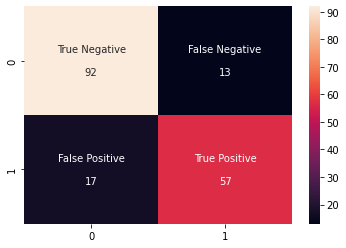

In [72]:
# C1:
names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i,j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2,2), fmt='')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


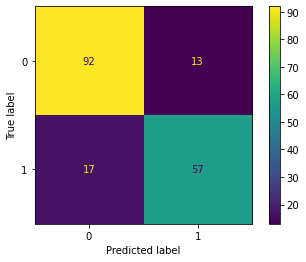

In [73]:
# C2:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)

## Với những thông số trên, có thể xây dựng được những thông số sau:
- Accuracy: (chỉ sdung cho data balanced)
    - <font color="yellow"> **Acc** = (TP+TN)/total </font> 
- Error rate:
    - <font color="yellow"> **Err** = 1 - **Acc** = (FP+FN)/total </font>
- Precism:
    - <font color="yellow"> **Pre** = TP/(TP+FP) </font>
- Recall: (~ Precism)
    - <font color="yellow"> **Rec** = TP/(TP+FP) </font>
- F1_score:
    - <font color="yellow"> **F1_score** = (Pre*Rec)/2(Pre+Rec) </font>

- use **Classification_report**

In [74]:
print(classification_report(y_test, y_pred))                                              # support là số bản ghi (records)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



# <font color="violet"> Cách save Models / processed data </font>
- Shallow Learning: 
    - Pickle
    - Joblib
- Deep Learning: 
    - .h5
    - .hdfs5

In [75]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [76]:
clf.fit(x_train, y_train)

LogisticRegression()

- Pickle

In [77]:
import pickle as pkl
pkl.dump(clf, open('My_model_saved.pkl','wb'))

In [78]:
loaded_model = pkl.load(open('My_model_saved.pkl','rb'))

In [79]:
loaded_model

LogisticRegression()

In [80]:
y_pred = loaded_model.predict(x_test)

In [81]:
print(classification_report(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



- Joblib

In [82]:
import joblib
joblib.dump(clf, 'My_model_1_saved.joblib')

['My_model_1_saved.joblib']

In [83]:
loaded_model1 = joblib.load('My_model_1_saved.joblib')

In [84]:
loaded_model1

LogisticRegression()

In [85]:
y_pred = loaded_model1.predict(x_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



# <font color="red">**Cách đưa raw data vào để predict luôn** </font>
### Dùng được cho tất cả các dạng của <font color="pink">**Supervised Learning**</font>

## --> Có thể áp dụng <font color="orange">**Pipeline**</font> (cho phần preprocess) --> <font color="purple">**saved Model**</font> (use Pickle/Joblib) --> <font color="green">**Predict**</font>

In [86]:
from sklearn.pipeline import Pipeline   

In [87]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
from sklearn.model_selection import train_test_split
training_data = titanic[['embarked','sex','pclass','age','survived']]
X_data, Y_data = training_data.drop(columns=['survived']), training_data['survived']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, random_state=42, test_size=0.2)

In [89]:
training_data.head()

,embarked,sex,pclass,age,survived
0,S,male,3,22.0,0
1,C,female,1,38.0,1
2,S,female,3,26.0,1
3,S,female,1,35.0,1
4,S,male,3,35.0,0


In [90]:
training_data.isna().sum()

embarked      2
sex           0
pclass        0
age         177
survived      0
dtype: int64

In [91]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [92]:
categ_cols = ['embarked','sex']
categ_trans = Pipeline(steps = 
                      [('imputer', SimpleImputer(strategy = 'most_frequent')),                                # (strategy=): có thể fillna bằng bki gri gì
                       ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))                       # (OneHotEncoder()): convert sang dạng Binary
                      ])

num_cols = ['age']
num_trans = Pipeline(steps = 
                     [('imputer', KNNImputer(n_neighbors=5)),                                                 # ( KNNImputer()): fillna bằng gtri x.hien nhiều nhất của những khu vực lân cận
                     ('scaler', RobustScaler())
                     ])

In [93]:
preprocessor = ColumnTransformer(transformers=[('num', num_trans, num_cols),
                                              ('categ', categ_trans, categ_cols)])

In [94]:
full_pipeline = Pipeline(steps = [('preprocess', preprocessor),                                                # (full_pipeline): this new data was processed and cleaned
                                 ('classifier', RandomForestClassifier())])

In [95]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age']),
                                                 ('categ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
 

In [96]:
x_train.head(), x_test.head()                                             # xem qua data thấy vẫn là dạng Raw, sau khi đưa vào Pipeline --> tự được xử lý

(    embarked     sex  pclass   age
 331        S    male       1  45.5
 733        S    male       2  23.0
 382        S    male       3  32.0
 704        S    male       3  26.0
 813        S  female       3   6.0,
     embarked     sex  pclass   age
 709        C    male       3   NaN
 439        S    male       2  31.0
 840        S    male       3  20.0
 720        S  female       2   6.0
 39         C  female       3  14.0)

In [97]:
y_pred = full_pipeline.predict(x_test)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       105
           1       0.66      0.64      0.65        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179

